<a href="https://colab.research.google.com/github/VenkataJanga/Price_Predection_Project/blob/master/RealEstatePricePredectionProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Load the libraries

In [0]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Load the Banglore Real Estate Data

In [82]:
data = pd.read_csv("/content/bengaluru_house_prices.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
area_type       13320 non-null object
availability    13320 non-null object
location        13319 non-null object
size            13304 non-null object
society         7818 non-null object
total_sqft      13320 non-null object
bath            13247 non-null float64
balcony         12711 non-null float64
price           13320 non-null float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [83]:
# find the number of records in the dataset
print(data.shape)

(13320, 9)


In [6]:
#find  the columns from the dataset
print(data.columns)

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')


In [84]:
# display the first four records
print(data.head())

              area_type   availability  ... balcony   price
0  Super built-up  Area         19-Dec  ...     1.0   39.07
1            Plot  Area  Ready To Move  ...     3.0  120.00
2        Built-up  Area  Ready To Move  ...     3.0   62.00
3  Super built-up  Area  Ready To Move  ...     1.0   95.00
4  Super built-up  Area  Ready To Move  ...     1.0   51.00

[5 rows x 9 columns]


In [85]:
#find the predictions, we do not required some of the columns in the dataset
data1 = data.drop(['area_type','availability','society','balcony'],axis =1)
print(data1.head())

                   location       size total_sqft  bath   price
0  Electronic City Phase II      2 BHK       1056   2.0   39.07
1          Chikka Tirupathi  4 Bedroom       2600   5.0  120.00
2               Uttarahalli      3 BHK       1440   2.0   62.00
3        Lingadheeranahalli      3 BHK       1521   3.0   95.00
4                  Kothanur      2 BHK       1200   2.0   51.00


In [86]:
#find the datasize
print(data1.shape)

(13320, 5)


In [11]:
#find the null values in the dataset
data1.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [0]:
#drop the rows which are in null records
data2 = data1.dropna()


In [88]:
#verifying the null values  in the dataset
data2.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [89]:
#check the current datasize from the dataset
print(data2.shape)

(13246, 5)


In [90]:
#verify the unique names of the SIZE column in the dataset
data2['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [91]:
# in size column having different values but most of the same in the dataset, 
# so we make those columns in to Unique name called 'bhk'and will take only numeric valuee.
# for this, we need split the data and will only take first value and convert from string to int
data2['bhk'] = data2['size'].apply(lambda x:int(x.split(' ')[0]) )
data2.bhk.unique()


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

In [0]:
#convert the 'total_sqft' column from string in to float value
def is_float(x):
  try:
    float(x)
  except:
    return False
  return True

In [92]:
data2[data2['total_sqft'].apply(is_float)].head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [93]:
data2[~data2['total_sqft'].apply(is_float)].head(10)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [0]:
# find the average( 1145 - 1340) and ignore those are not in range( 34.46Sq. Meter	)
def convert_total_sqft_to_avg_num(x):
  tokens = x.split('-')
  if len(tokens) == 2:
    return (float(tokens[0])+float(tokens[1]))/2
  try:
    return float(x)
  except:
    return None



In [94]:
convert_total_sqft_to_avg_num('1120')

1120.0

In [0]:
data3 = data2.copy()
data3['total_sqft'] = data3['total_sqft'].apply(convert_total_sqft_to_avg_num)

In [96]:
print(data3.head())

                   location       size  total_sqft  bath   price  bhk
0  Electronic City Phase II      2 BHK      1056.0   2.0   39.07    2
1          Chikka Tirupathi  4 Bedroom      2600.0   5.0  120.00    4
2               Uttarahalli      3 BHK      1440.0   2.0   62.00    3
3        Lingadheeranahalli      3 BHK      1521.0   3.0   95.00    3
4                  Kothanur      2 BHK      1200.0   2.0   51.00    2


In [0]:
data4 = data3.copy()


In [98]:
data4.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [0]:
# we create a new columns whihc is price_per_sqft and calcluate the price * lalk / number of sqrft
data4['price_per_sqft'] = data4['price'] * 100000/ data4['total_sqft']

In [100]:
print(data4.head())

                   location       size  total_sqft  ...   price  bhk  price_per_sqft
0  Electronic City Phase II      2 BHK      1056.0  ...   39.07    2     3699.810606
1          Chikka Tirupathi  4 Bedroom      2600.0  ...  120.00    4     4615.384615
2               Uttarahalli      3 BHK      1440.0  ...   62.00    3     4305.555556
3        Lingadheeranahalli      3 BHK      1521.0  ...   95.00    3     6245.890861
4                  Kothanur      2 BHK      1200.0  ...   51.00    2     4250.000000

[5 rows x 7 columns]


In [101]:
# location is categorical columns and find the number of locaitons
len(data4['location'].unique())

1304

In [102]:
# find the how many datapoints in locaiton column
data4.locaiton = data4.location.apply(lambda x:x.strip())
location_states = data4.groupby('location')['location'].agg('count').sort_values(ascending = False)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


In [103]:
print(location_states)

location
Whitefield                            534
Sarjapur  Road                        392
Electronic City                       302
Kanakpura Road                        266
Thanisandra                           233
                                     ... 
Konappana Agrahara                      1
Kodanda Reddy Layout                    1
Kirloskar layout, Basaveshwarnagar      1
Kengeri Satellite Town Stage II         1
 Anekal                                 1
Name: location, Length: 1304, dtype: int64


In [104]:
# to find the 10 data points in the locaiton
len(location_states[location_states<=10])

1063

In [0]:
location_states_leass_than_10 = location_states[location_states<=10]

In [105]:
len(data4.location.unique())

1304

In [0]:
data4.location = data4.location.apply(lambda x:'others' if x in location_states_leass_than_10 else x ) 

In [109]:
len(data4.location.unique())

242

In [110]:
print(data4.head(10))

                   location       size  total_sqft  ...   price  bhk  price_per_sqft
0  Electronic City Phase II      2 BHK      1056.0  ...   39.07    2     3699.810606
1          Chikka Tirupathi  4 Bedroom      2600.0  ...  120.00    4     4615.384615
2               Uttarahalli      3 BHK      1440.0  ...   62.00    3     4305.555556
3        Lingadheeranahalli      3 BHK      1521.0  ...   95.00    3     6245.890861
4                  Kothanur      2 BHK      1200.0  ...   51.00    2     4250.000000
5                Whitefield      2 BHK      1170.0  ...   38.00    2     3247.863248
6          Old Airport Road      4 BHK      2732.0  ...  204.00    4     7467.057101
7              Rajaji Nagar      4 BHK      3300.0  ...  600.00    4    18181.818182
8              Marathahalli      3 BHK      1310.0  ...   63.25    3     4828.244275
9                    others  6 Bedroom      1020.0  ...  370.00    6    36274.509804

[10 rows x 7 columns]


# Outlier Detection and Removal

to detect the outlier: standard deviation and simple domain knowledge

In [111]:
data4[data4.total_sqft/data4.bhk < 300].head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,others,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,others,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,others,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [0]:
# 1. filter these values and create new data5
 data5 = data4[~(data4.total_sqft/data4.bhk < 300)]

In [116]:
data5.shape

(12502, 7)

In [117]:
# 2. find the min and max values of price_per_sqft
data5.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [0]:
# some location is low price and some location is high price. 
# we have to find  std and mean per location then filter the behand the std
def remove_locations_price_per_sqft_Outlier(inputdata):
  data_out = pd.DataFrame()
  for key , subdf in inputdata.groupby('location'):
    mean_value = np.mean(subdf.price_per_sqft)
    stnd_value = np.std(subdf.price_per_sqft)
    reduce_df = subdf[(subdf.price_per_sqft > (mean_value-stnd_value)) & (subdf.price_per_sqft <= (mean_value +stnd_value))]
    data_out = pd.concat([data_out , reduce_df], ignore_index= True)
  return data_out


In [122]:
data6 = remove_locations_price_per_sqft_Outlier(data5)
print(data5.shape,data6.shape)

(12502, 7) (10244, 7)


In [0]:
# 2. draw the scatter plot and find the outliers
def plot_scatter_chart(inputData,location):
  bhk2 = inputData[(inputData.location == location) & (inputData.bhk == 2)]
  bhk3 = inputData[(inputData.location == location) & (inputData.bhk == 3)]
  matplotlib.rcParams['figure.figsize'] = (15,10)
  plt.scatter(bhk2.total_sqft,bhk2.price_per_sqft,color ='blue', label = '2 BHK APTMT',s = 50)
  plt.scatter(bhk3.total_sqft,bhk3.price_per_sqft,color ='green',marker = "+", label = '3 BHK APTMT',s = 50)
  plt.xlabel('Total Square Feet Area')
  plt.ylabel('Price Per Square Feet')
  plt.title(location)
  plt.legend()

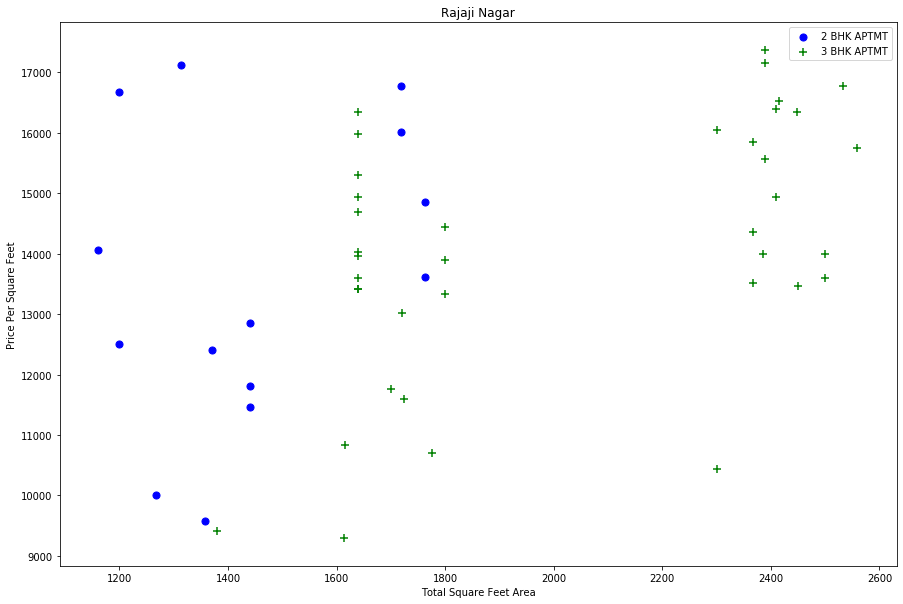

In [147]:
plot_scatter_chart(data6,"Rajaji Nagar")

In [0]:
def remove_bhk_outliers(inputData):
    exclude_indices = np.array([])
    for location, location_df in inputData.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return inputData.drop(exclude_indices,axis='index')

In [151]:
data7 = remove_bhk_outliers(data6)
print(data6.shape, data7.shape)

(10244, 7) (7342, 7)


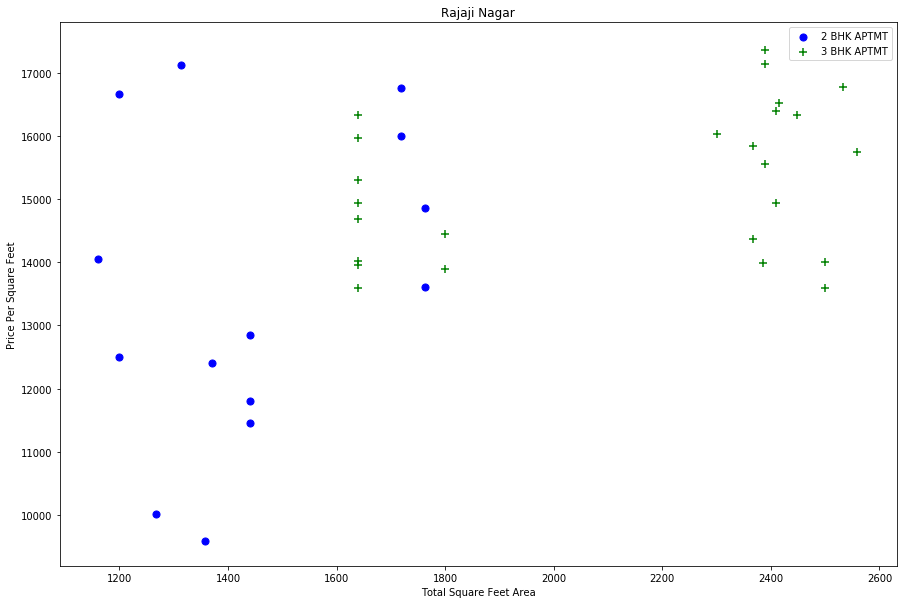

In [153]:
# plot again the rajai nagar location
plot_scatter_chart(data7,"Rajaji Nagar")

Text(0, 0.5, 'Count')

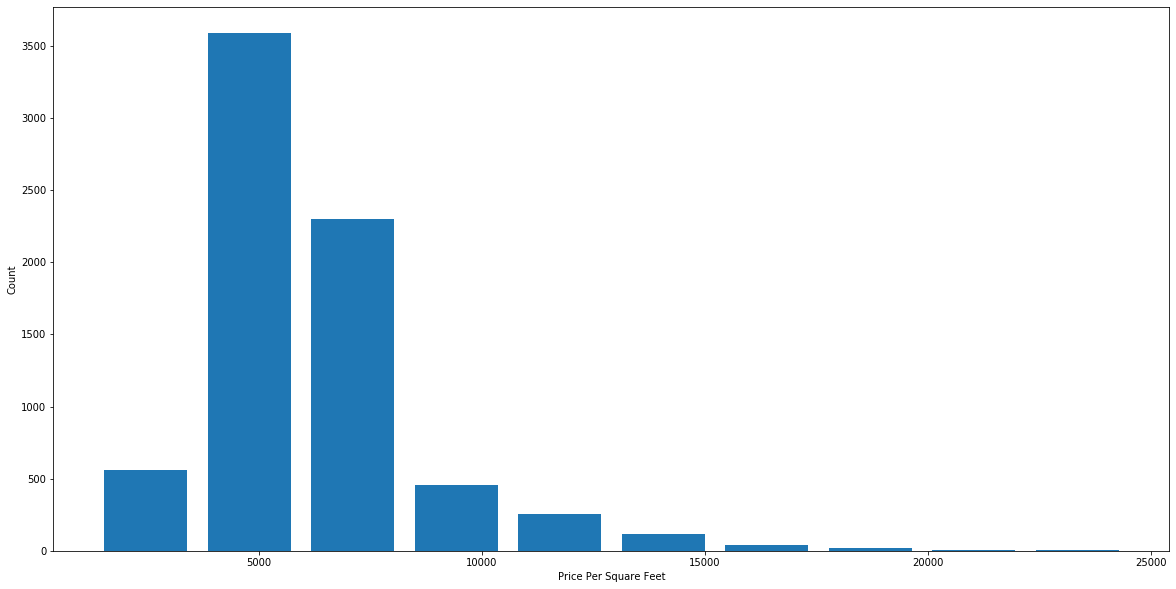

In [154]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(data7.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [156]:
data7.bath.unique()

array([ 2.,  3.,  4.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [158]:
data7[data7.bath >10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
5271,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8481,others,10 BHK,12000.0,12.0,525.0,10,4375.000000
8570,others,16 BHK,10000.0,16.0,550.0,16,5500.000000
9309,others,11 BHK,6000.0,12.0,150.0,11,2500.000000
9641,others,13 BHK,5425.0,13.0,275.0,13,5069.124424


Text(0, 0.5, 'Count')

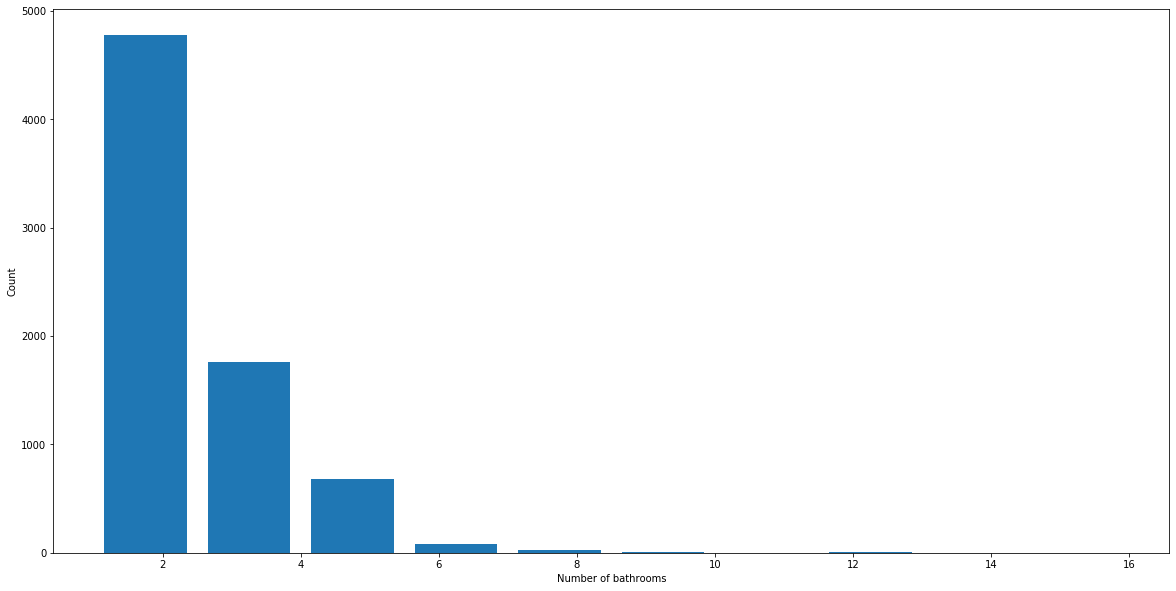

In [159]:
plt.hist(data7.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [165]:
data7[data7.bath>10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
5271,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8481,others,10 BHK,12000.0,12.0,525.0,10,4375.000000
8570,others,16 BHK,10000.0,16.0,550.0,16,5500.000000
9309,others,11 BHK,6000.0,12.0,150.0,11,2500.000000
9641,others,13 BHK,5425.0,13.0,275.0,13,5069.124424


In [0]:
data8 = data7[data7.bath < data7.bhk+2]

In [169]:
data8.shape

(7264, 7)

In [170]:
print(data8.head())

               location       size  total_sqft  ...  price  bhk  price_per_sqft
1   Devarachikkanahalli      2 BHK      1250.0  ...   40.0    2     3200.000000
2   Devarachikkanahalli  2 Bedroom      1200.0  ...   83.0    2     6916.666667
3   Devarachikkanahalli      2 BHK      1170.0  ...   40.0    2     3418.803419
4   Devarachikkanahalli      3 BHK      1425.0  ...   65.0    3     4561.403509
5   Devarachikkanahalli      2 BHK       947.0  ...   43.0    2     4540.654699

[5 rows x 7 columns]


In [171]:
data9 = data8.drop(columns=['size','price_per_sqft'],axis=1)
data9.head()

,location,total_sqft,bath,price,bhk
1,Devarachikkanahalli,1250.0,2.0,40.0,2
2,Devarachikkanahalli,1200.0,2.0,83.0,2
3,Devarachikkanahalli,1170.0,2.0,40.0,2
4,Devarachikkanahalli,1425.0,2.0,65.0,3
5,Devarachikkanahalli,947.0,2.0,43.0,2


In [178]:
dummies = pd.get_dummies(data9.location)
dummies.head()

,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,Abbigere,Akshaya Nagar,Ambalipura,Ambedkar Nagar,Amruthahalli,Anandapura,Ananth Nagar,Anekal,Anjanapura,Ardendale,Arekere,Attibele,BEML Layout,BTM 2nd Stage,BTM Layout,Babusapalaya,Badavala Nagar,Balagere,Banashankari,Banashankari Stage II,Banashankari Stage III,Banashankari Stage V,Banashankari Stage VI,Banaswadi,Banjara Layout,Bannerghatta,Bannerghatta Road,Basavangudi,...,Sarakki Nagar,Sarjapur,Sarjapur Road,Sarjapura - Attibele Road,Sector 2 HSR Layout,Sector 7 HSR Layout,Seegehalli,Shampura,Shivaji Nagar,Singasandra,Somasundara Palya,Sompura,Sonnenahalli,Subramanyapura,Sultan Palaya,TC Palaya,Talaghattapura,Thanisandra,Thigalarapalya,Thubarahalli,Thyagaraja Nagar,Tindlu,Tumkur Road,Ulsoor,Uttarahalli,Varthur,Varthur Road,Vasanthapura,Vidyaranyapura,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,others
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
dummies = dummies.drop(columns=['others'],axis='columns')

In [0]:
data10 = pd.concat([data9, dummies],axis = 1)

In [181]:
data10.head()

,location,total_sqft,bath,price,bhk,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,Abbigere,Akshaya Nagar,Ambalipura,Ambedkar Nagar,Amruthahalli,Anandapura,Ananth Nagar,Anekal,Anjanapura,Ardendale,Arekere,Attibele,BEML Layout,BTM 2nd Stage,BTM Layout,Babusapalaya,Badavala Nagar,Balagere,Banashankari,Banashankari Stage II,Banashankari Stage III,Banashankari Stage V,Banashankari Stage VI,...,Sanjay nagar,Sarakki Nagar,Sarjapur,Sarjapur Road,Sarjapura - Attibele Road,Sector 2 HSR Layout,Sector 7 HSR Layout,Seegehalli,Shampura,Shivaji Nagar,Singasandra,Somasundara Palya,Sompura,Sonnenahalli,Subramanyapura,Sultan Palaya,TC Palaya,Talaghattapura,Thanisandra,Thigalarapalya,Thubarahalli,Thyagaraja Nagar,Tindlu,Tumkur Road,Ulsoor,Uttarahalli,Varthur,Varthur Road,Vasanthapura,Vidyaranyapura,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,Devarachikkanahalli,1250.0,2.0,40.0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Devarachikkanahalli,1200.0,2.0,83.0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Devarachikkanahalli,1170.0,2.0,40.0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Devarachikkanahalli,1425.0,2.0,65.0,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,Devarachikkanahalli,947.0,2.0,43.0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
# location columns is not required
data11 = data10.drop(columns=['location'],axis='columns')

In [185]:
print(data11.head(3))

   total_sqft  bath  price  ...  Yelahanka New Town  Yelenahalli  Yeshwanthpur
1      1250.0   2.0   40.0  ...                   0            0             0
2      1200.0   2.0   83.0  ...                   0            0             0
3      1170.0   2.0   40.0  ...                   0            0             0

[3 rows x 245 columns]


# split the data into dependent and independent varables

In [186]:
X = data11.drop(columns=['price'],axis=1)
y = data11.price
print(X.shape, y.shape)

(7264, 244) (7264,)


# Split train and test data

In [0]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.2,random_state = 11)


# Create Linear Regression Model

In [190]:
lr_model = LinearRegression()
lr_model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [191]:
lr_model.score(X_test,y_test)

0.8170732070483663

# Shufflesplit and Cross Validation

In [201]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv = ShuffleSplit(n_splits = 5)
cross_val_score(LinearRegression(),X,y,cv=cv)

array([0.87489835, 0.74836494, 0.85053488, 0.85823054, 0.86148703])

# Lasso , Ridge, Decision Tree Regressor

In [0]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor

# Find best model using GridSearchCV

In [0]:
def find_best_model_using_gridSearchCV(X,y):
  best_algorithm = {
      'linear_regression' : {
          'model':LinearRegression(),
          'params': {
              'normalize' : [True,False]
          }
       },
       'lasso_regression' : {
           'model':Lasso(),
           'params':{
               'alpha':[1,2],
               'selection':['random','cyclic']
           }
       },
       'decision_tree_regressor': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
  }
  scores=[]
  cv = ShuffleSplit(n_splits = 5, test_size=0.2,random_state=10)
  for alg_name, config in best_algorithm.items():
    gs = GridSearchCV(config['model'],config['params'],cv=cv,return_train_score=False)
    gs.fit(X,y)
    scores.append({
        'model' : alg_name,
        'best_score':gs.best_score_,
        'best_params':gs.best_params_
    })
  return pd.DataFrame(scores, columns=['model','best_score','best_params'])


In [225]:
find_best_model_using_gridSearchCV(X,y)

,model,best_score,best_params
0,linear_regression,0.821844,{'normalize': True}
1,lasso_regression,0.693773,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree_regressor,0.727654,"{'criterion': 'mse', 'splitter': 'random'}"


In [217]:
find_best_model_using_gridSearchCV(X,y)

,model,best_score,best_params
0,linear_regression,0.821844,{'normalize': True}
1,lasso_regression,0.693756,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.739408,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


# Price Prediction 

In [230]:
X.columns

Index(['total_sqft', 'bath', 'bhk', ' Devarachikkanahalli',
       '1st Block Jayanagar', '1st Phase JP Nagar',
       '2nd Phase Judicial Layout', '2nd Stage Nagarbhavi',
       '5th Block Hbr Layout', '5th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=244)

In [231]:
np.where(X.columns == '2nd Stage Nagarbhavi')[0][0]

7

In [0]:
def price_prediction(location,sqft,bath,bhk):
  loc_index = np.where(X.columns==location)[0][0]
  
  x = np.zeros(len(X.columns))
  x[0] = sqft
  x[1] = bath
  x[2] = bhk
  if loc_index >= 0 :
    x[loc_index] = 1

  return lr_model.predict([x])[0]

In [251]:
price_prediction('Rajaji Nagar',1000, 2, 2)

220.17835453227195

In [254]:
price_prediction('Indira Nagar',1000, 2, 2)

169.74630056772673

# Export the tested model to a pickle file

In [0]:
import pickle
with open('banglore_home_price_model.pickle','wb') as file:
  pickle.dump(lr_model,file)

# Export location and column information to a file that will be useful later on in our prediction application

In [0]:
import json
columns = {
    'data_columns': [col.lower() for col in X.columns]
}
with open('common.json','w') as file:
  file.write(json.dumps(columns))